### Investigate country evolution

We will take information provided by GAPMinder.org to see the evolution of child mortality, fertility, income per person and life expectancy to see if we can see trends. later we will try to do full analysis on this, compare to with other countries and try to train some predictive models using this information.

First we will load up the databases that will be used for this. This will be dataframes usually containing information from 1800 till 2018 per year, per country.

Again massive thanks to gapminder for providing this information!

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

child_mort = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv', index_col ='country')
fertility = pd.read_csv('children_per_woman_total_fertility.csv', index_col ='country')
income_pp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv', index_col ='country')
life_exp = pd.read_csv('life_expectancy_years.csv', index_col ='country')

Next we will extract the data on Belgium from each of the databases and create a new data-frame with all the attributes for Belgium, indexed by year.

In [192]:
be_mort = child_mort.loc['Belgium', [str(x) for x in range(1800, 2019)]].tolist()
be_fert = fertility.loc['Belgium', [str(x) for x in range(1800, 2019)]].tolist()
be_inc = income_pp.loc['Belgium', [str(x) for x in range(1800, 2019)]].tolist()
be_exp = life_exp.loc['Belgium', [str(x) for x in range(1800, 2019)]].tolist()

years = [x for x in range(1800, 2019)]

structure = {'Year': years, 'ChildMortality': be_mort, 'Fertility': be_fert, 'IncomePerPerson': be_inc, 'LifeExpency': be_exp}
be_info = pd.DataFrame(structure).set_index('Year')

In [193]:
print(BeInfo)

      ChildMortality  Fertility  IncomePerPerson  LifeExpency
Year                                                         
1800          322.00       4.85             2410         40.0
1801          322.00       4.85             2410         40.0
1802          322.00       4.84             2410         40.0
1803          322.00       4.84             2410         40.0
1804          322.00       4.83             2410         40.0
...              ...        ...              ...          ...
2014            4.10       1.79            41400         80.9
2015            4.00       1.79            41700         80.9
2016            3.90       1.79            41900         80.9
2017            3.69       1.79            42400         81.1
2018            3.55       1.80            42800         81.2

[219 rows x 4 columns]


To be able to do some quick checks we will create a function that returns the normalised reviation value for each attribute compared to it's average. 

With this we will be able to see general trends in the atributes

In [194]:
def get_relative_values(values):
    av_val = np.sum(values) / len(values)
    rel_val = (values - av_val) / av_val
    
    return rel_val

In [195]:
rel_values = get_relative_values(be_info)

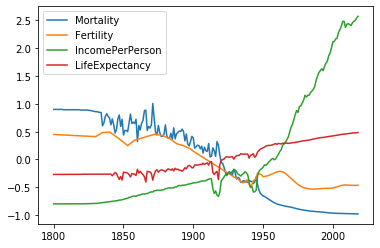

In [187]:
plt.plot(rel_values.index, rel_values['ChildMortality'], label='Mortality')
plt.plot(rel_values.index, rel_values['Fertility'], label='Fertility')
plt.plot(rel_values.index, rel_values['IncomePerPerson'], label='IncomePerPerson')
plt.plot(rel_values.index, rel_values['LifeExpency'], label='LifeExpectancy')
plt.legend()
plt.show()

With this we can see that two trends emerge. 
Namely the downward trend of fertility and childmortality and the upward trend of income per person and life expectancy.

We can see that in both of casses both attributes that follow each trend, keep a very simular curve through the 1800's and start of the 1900's. 
Though at roughly the same time, around 1945, both income per person as well as fertility deviate from their trend partner and gain a stronger upward trend. 
Especially income per person skyrockets at this time.

Do note that these values are only relative to themself. meaning that we can look at the trends but the values between attributes cannot be compared like this.